In [1]:
import sys
sys.path.append('../component')  # Ensure sys is imported before using it
import pandas as pd
from utils import *
from class_ARIMA_model import ARIMA_model
from class_EDA import *
import os
os.getcwd()

'/home/ubuntu/Capstone_Group_1/code/main_code'

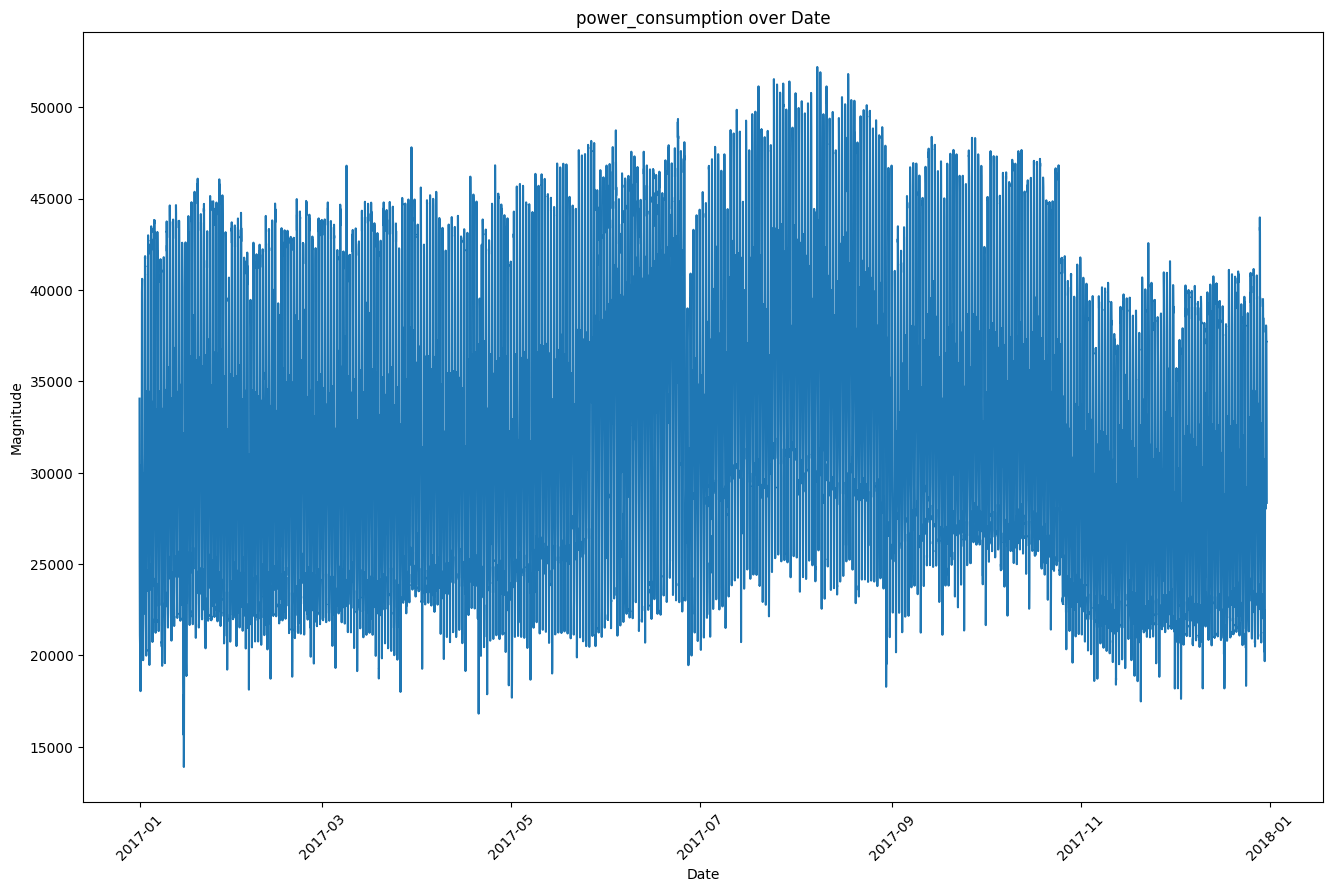

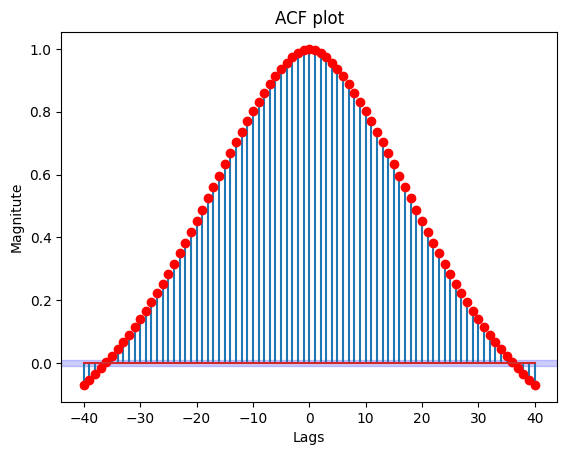

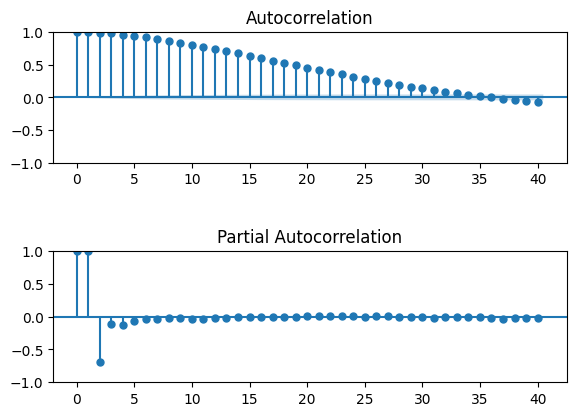

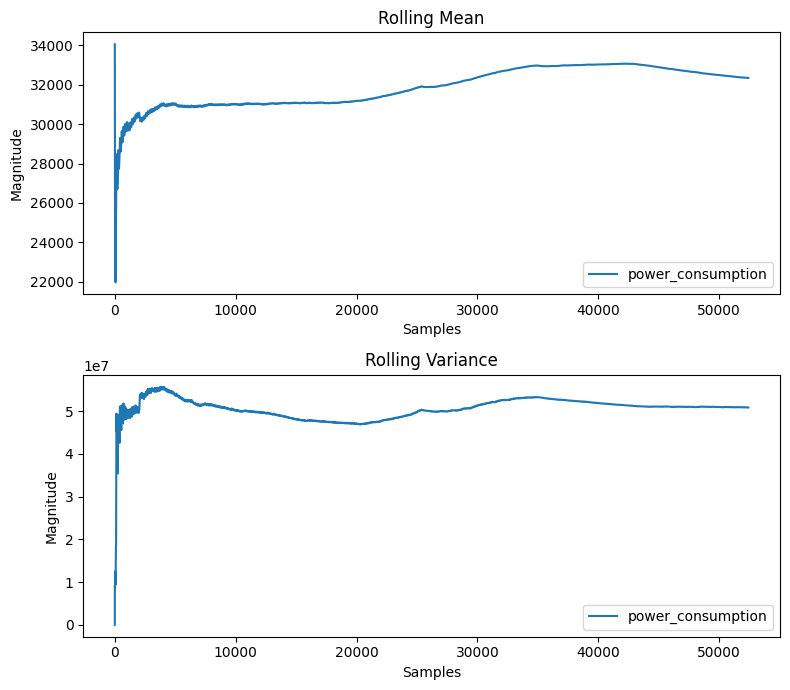

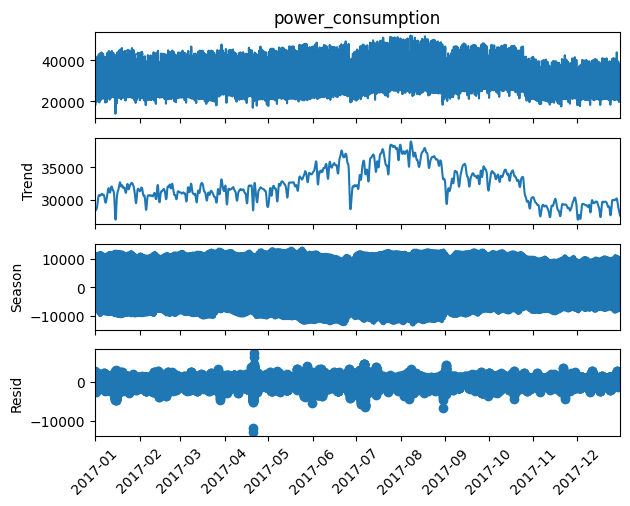

The strength of trend for this data set is 92.41%
The strength of seasonality for this data set is  98.64%


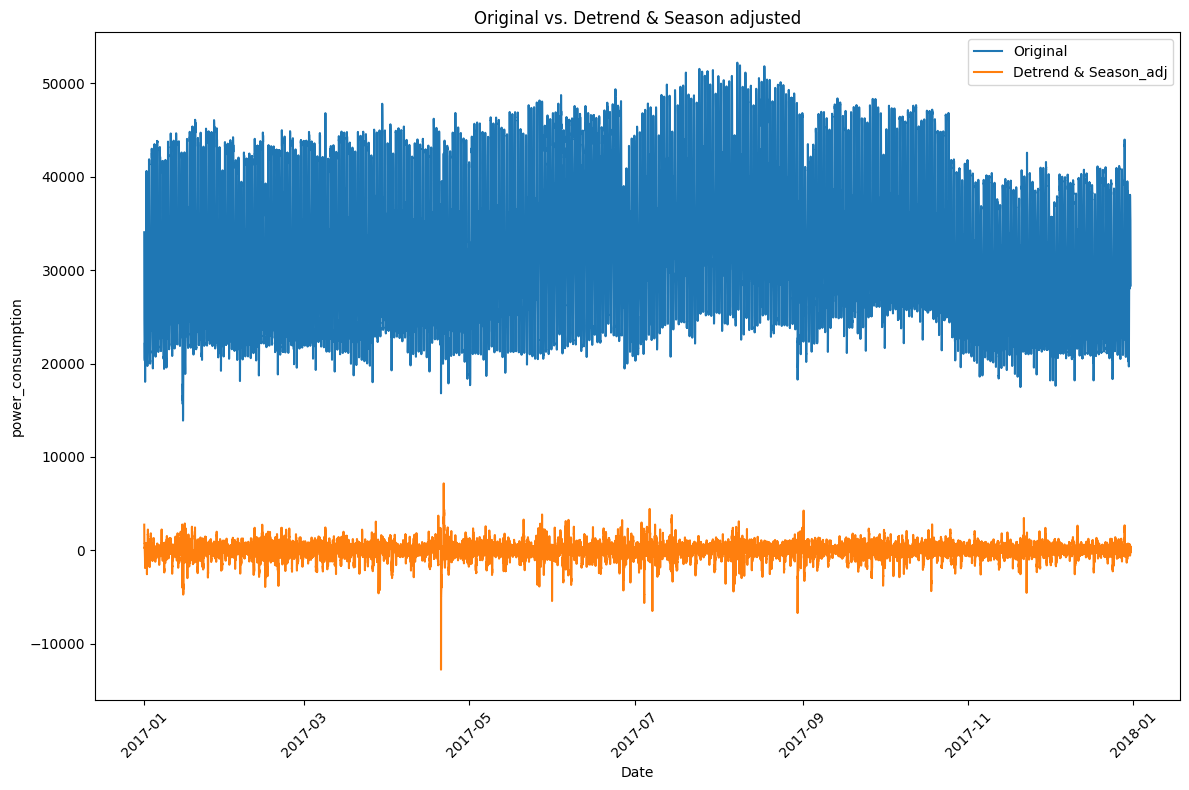

In [2]:
path = '../data/power_consumption.csv'
eda = EDA(path)
df = eda.read_data()
eda.plots(df, 40, 144, Col=1)

In [3]:
df = eda.read_data()

df_train, dt_temp = train_test_split(df, test_size=0.3, shuffle=False)
df_test, df_val = train_test_split(dt_temp, test_size=0.5, shuffle=False)

df_train['date'] = pd.to_datetime(df_train['date'])
df_train.set_index('date', inplace=True)

df_test['date'] = pd.to_datetime(df_test['date'])
df_test.set_index('date', inplace=True)

data = df_train['power_consumption'].values.reshape(-1, 1)
print(data.shape)

(36691, 1)


### GPAC table for order

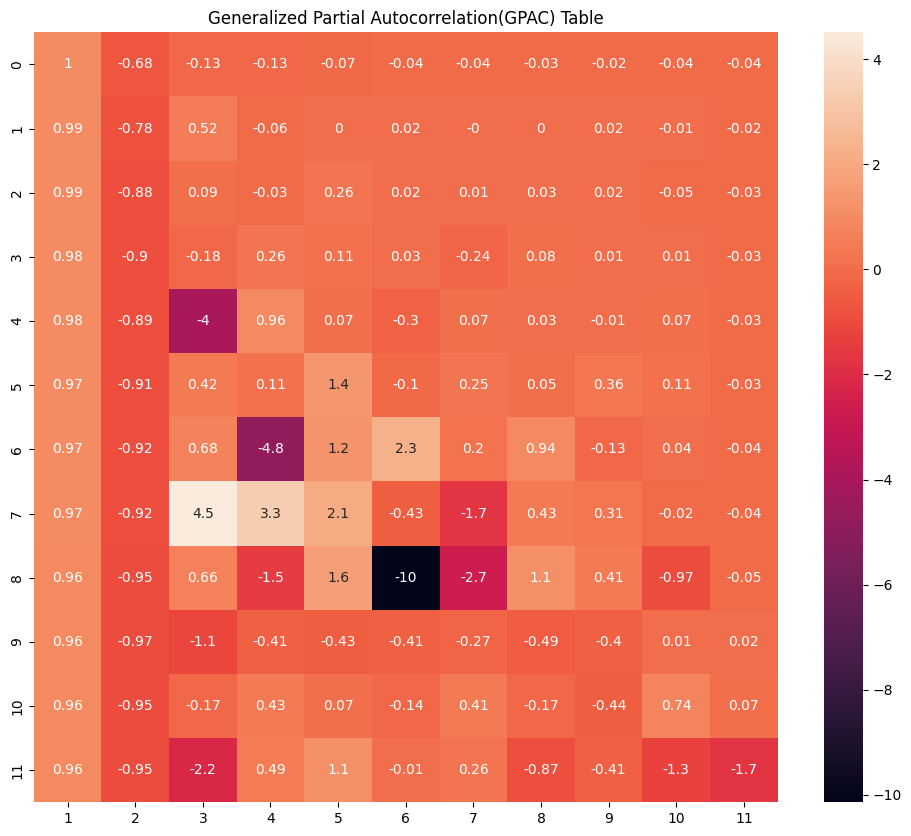

,1,2,3,4,5,6,7,8,9,10,11
0,1.00,-0.68,-0.13,-0.13,-0.07,-0.04,-0.04,-0.03,-0.02,-0.04,-0.04
1,0.99,-0.78,0.52,-0.06,0.00,0.02,-0.00,0.00,0.02,-0.01,-0.02
2,0.99,-0.88,0.09,-0.03,0.26,0.02,0.01,0.03,0.02,-0.05,-0.03
3,0.98,-0.90,-0.18,0.26,0.11,0.03,-0.24,0.08,0.01,0.01,-0.03
4,0.98,-0.89,-4.04,0.96,0.07,-0.30,0.07,0.03,-0.01,0.07,-0.03
5,0.97,-0.91,0.42,0.11,1.38,-0.10,0.25,0.05,0.36,0.11,-0.03
6,0.97,-0.92,0.68,-4.78,1.25,2.29,0.20,0.94,-0.13,0.04,-0.04
7,0.97,-0.92,4.51,3.32,2.08,-0.43,-1.70,0.43,0.31,-0.02,-0.04
8,0.96,-0.95,0.66,-1.47,1.62,-10.14,-2.73,1.10,0.41,-0.97,-0.05
9,0.96,-0.97,-1.14,-0.41,-0.43,-0.41,-0.27,-0.49,-0.40,0.01,0.02


In [4]:
GPAC_table(data, J=12, K=12)

# ARIMA

### 1. AR